## CS231n Lecture_8 Pytorch and TensorFlow Notebook

Running example: Train a two-layer ReLU network on random data with L2 loss.

In [1]:
import numpy as np
import tensorflow as tf

/Users/xuhaomin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def train_with_group_method():
    """
    The purpose to use group is to avoid 
    weights copied from disk and keep them in the GPU
    """
    
    # Define

    ## create placeholder(no compute)
    N, D, H = 64, 1000, 100
    x = tf.placeholder(tf.float32, shape=(N, D))
    y = tf.placeholder(tf.float32, shape=(N, D))
    ## create w1 and w2 as variable, which presists in the graph between calls(no compute)
    w1 = tf.Variable(tf.random_normal((D, H)))
    w2 = tf.Variable(tf.random_normal((H, D)))

    ## build graph 
    ### forward pass(no compute)
    h = tf.maximum(tf.matmul(x, w1), 0)
    y_pred = tf.matmul(h, w2)
    diff = y_pred - y
    loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
    ### tell tf to compute loss of gradient with respect to w1 and w2(no compute)
    grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])
    ### add assign operations to update w1 and w2 as part of the graph.
    learning_rate = 2.7e-5
    new_w1 = w1.assign(w1 - learning_rate * grad_w1)
    new_w2 = w2.assign(w2 - learning_rate * grad_w2)
    ### add dummy graph node that depends on updates
    updates = tf.group(new_w1, new_w2)

    # Run
    loss_log = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        values = {x: np.random.randn(N, D),
                  y: np.random.randn(N, D),}
        for t in range(50):
            # out = sess.run([loss, grad_w1, grad_w2],
            #                feed_dict=values)
            # loss_val, grad_w1_val, grad_w2_val = out

            ##the updates here tell graph to compute dummy node
            loss_val, _ = sess.run([loss, updates], feed_dict=values)
            loss_log.append(loss_val)
    return loss_log

In [3]:
def train_with_optimizer():    
    
    
    # Define

    N, D, H = 64, 1000, 100
    x = tf.placeholder(tf.float32, shape=(N, D))
    y = tf.placeholder(tf.float32, shape=(N, D))

    w1 = tf.Variable(tf.random_normal((D, H)))
    w2 = tf.Variable(tf.random_normal((H, D)))

    # build graph
    
    # forward pass(no compute)
    h = tf.maximum(tf.matmul(x, w1), 0)
    y_pred = tf.matmul(h, w2)

    loss = tf.losses.mean_squared_error(y_pred, y)
    
    optimizer = tf.train.GradientDescentOptimizer(2.7e-5)
    # variable w1 and w2 are marked as trainable by default here
    updates = optimizer.minimize(loss)

    # Run

    with tf.Session() as sess:
        # tf.global_variables_initializer uses tf.random_normal to initialize variables
        sess.run(tf.global_variables_initializer())
        values = {x: np.random.randn(N, D),
                  y: np.random.randn(N, D),}
        loss_log = []
        for t in range(50):
#             out = sess.run([loss, grad_w1, grad_w2],
#                            feed_dict=values)
#             loss_val, grad_w1_val, grad_w2_val = out

            # the updates here tell graph to compute dummy node
            loss_val, _ = sess.run([loss, updates], feed_dict=values)
            loss_log.append(loss_val)
    return loss_log 

In [4]:
def train_with_tf_layers():

    N, D, H = 64, 1000, 100
    x = tf.placeholder(tf.float32, shape=(N, D))
    y = tf.placeholder(tf.float32, shape=(N, D))

    ##### use tf.layers to form the layers #####
    init = tf.contrib.layers.xavier_initializer()
    # tf.layers automatically sets up weight and bias.
    h = tf.layers.dense(inputs=x, units=H, activation=tf.nn.relu, kernel_initializer=init)
    y_pred = tf.layers.dense(inputs=h, units=D, kernel_initializer=init)
    ############################################
    
    loss = tf.losses.mean_squared_error(y_pred, y)
    
    optimizer = tf.train.GradientDescentOptimizer(1e-1)
    updates = optimizer.minimize(loss)

    with tf.Session() as sess:
        # tf.global_variables_initializer uses tf.random_normal to initialize variables
        sess.run(tf.global_variables_initializer())
        values = {x: np.random.randn(N, D),
                  y: np.random.randn(N, D),}
        loss_log = []
        for t in range(50):
#             out = sess.run([loss, grad_w1, grad_w2],
#                            feed_dict=values)
#             loss_val, grad_w1_val, grad_w2_val = out

            # the updates here tell graph to compute dummy node
            loss_val, _ = sess.run([loss, updates], feed_dict=values)
            loss_log.append(loss_val)
    return loss_log 

In [10]:
def train_with_keras_1():

    N, D, H = 64, 1000, 100
    x = tf.placeholder(tf.float32, shape=(N, D))
    y = tf.placeholder(tf.float32, shape=(N, D))
    
    ##### use keras to form the layers #####
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(H, input_shape=(D, ), activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(D))
    y_pred = model(x)
    ########################################
    loss = tf.losses.mean_squared_error(y_pred, y)
    
    optimizer = tf.train.GradientDescentOptimizer(1e-1)
    updates = optimizer.minimize(loss)

    with tf.Session() as sess:
        # tf.global_variables_initializer uses tf.random_normal to initialize variables
        sess.run(tf.global_variables_initializer())
        values = {x: np.random.randn(N, D),
                  y: np.random.randn(N, D),}
        loss_log = []
        for t in range(50):
            # the updates here tell graph to compute dummy node
            loss_val, _ = sess.run([loss, updates], feed_dict=values)
            loss_log.append(loss_val)
    return loss_log 

In [13]:
def train_with_keras_2():
    
    N, D, H = 64, 1000, 100
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(H, input_shape=(D, ), activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(D))
    
    model.compile(loss=tf.keras.losses.mean_absolute_error,
                  optimizer=tf.keras.optimizers.SGD(lr=1e-1))
    
    x = np.random.randn(N, D)
    y = np.random.randn(N, D)
    
    history = model.fit(x, y, epochs=50, batch_size=N)
    
    return history

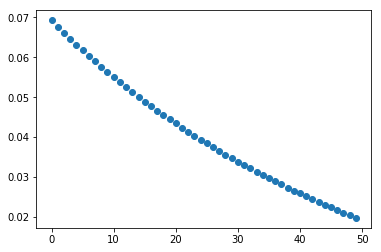

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#loss_log = train_with_group_method()
#loss_log = train_with_optimizer()
#loss_log = train_with_tf_layers()
loss_log = train_with_keras_1()

x = np.array([i for i in range(50)])
plt.plot(x, np.log10(loss_log), 'o')
plt.show()